<a href="https://colab.research.google.com/github/richa2710/buzz/blob/fun/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("creditcard.csv")

In [56]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [57]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,96296.000000,96296.000000,96296.000000,96296.000000,96296.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000,96295.000000
mean,41506.032359,-0.263397,-0.035467,0.676095,0.163153,-0.279221,0.094135,-0.107907,0.056211,-0.041047,-0.024138,0.255888,-0.077621,0.012935,0.063634,0.190180,-0.008064,0.060742,-0.093250,-0.023298,0.044083,-0.030326,-0.107862,-0.037339,0.009622,0.131972,0.026626,0.000365,0.001495,98.483632,0.002274
std,16687.886801,1.864556,1.659203,1.332627,1.352192,1.363086,1.302960,1.218906,1.205332,1.126066,1.074130,1.069753,1.124520,1.041978,0.974104,0.930713,0.901678,0.951429,0.848217,0.817728,0.762437,0.719809,0.634444,0.638999,0.594908,0.441893,0.495268,0.396318,0.327513,266.545461,0.047635
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33057.000000,-1.028360,-0.601959,0.177946,-0.715205,-0.898403,-0.648071,-0.600359,-0.138376,-0.697792,-0.497735,-0.520360,-0.499168,-0.675411,-0.331847,-0.362099,-0.482866,-0.399588,-0.563943,-0.517993,-0.169305,-0.224468,-0.529473,-0.176877,-0.322741,-0.132509,-0.325533,-0.062849,-0.005506,7.580000,0.000000
50%,43515.000000,-0.259945,0.075846,0.755368,0.190901,-0.314192,-0.157006,-0.069066,0.073138,-0.114817,-0.094779,0.187025,0.106327,-0.003593,0.080981,0.296779,0.065864,0.001732,-0.087212,-0.027382,-0.024632,-0.057581,-0.082658,-0.049423,0.065022,0.170132,-0.071039,0.009733,0.023308,26.600000,0.000000
75%,54618.250000,1.153101,0.733420,1.379189,1.034209,0.251347,0.486871,0.416275,0.358445,0.568001,0.440624,1.070921,0.619780,0.691651,0.495861,0.863048,0.538178,0.460804,0.388366,0.479501,0.171032,0.119731,0.309355,0.081659,0.406364,0.419961,0.301973,0.082887,0.076433,89.695000,0.000000
max,65703.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.249433,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96296 entries, 0 to 96295
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    96296 non-null  int64  
 1   V1      96296 non-null  float64
 2   V2      96296 non-null  float64
 3   V3      96296 non-null  float64
 4   V4      96296 non-null  float64
 5   V5      96295 non-null  float64
 6   V6      96295 non-null  float64
 7   V7      96295 non-null  float64
 8   V8      96295 non-null  float64
 9   V9      96295 non-null  float64
 10  V10     96295 non-null  float64
 11  V11     96295 non-null  float64
 12  V12     96295 non-null  float64
 13  V13     96295 non-null  float64
 14  V14     96295 non-null  float64
 15  V15     96295 non-null  float64
 16  V16     96295 non-null  float64
 17  V17     96295 non-null  float64
 18  V18     96295 non-null  float64
 19  V19     96295 non-null  float64
 20  V20     96295 non-null  float64
 21  V21     96295 non-null  float64
 22

In [59]:
df['Class'].unique()

array([ 0.,  1., nan])

In [60]:
df['Class'].isna().sum()

1

In [61]:
df = df.drop(['Time'], axis=1)


In [62]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96290,1.228060,0.129418,0.192568,0.018252,-0.397910,-1.117134,0.225054,-0.181625,-0.329145,0.031868,1.718144,0.980925,-0.182210,0.652908,0.145500,0.258411,-0.372839,-0.569868,0.490239,-0.060234,-0.375050,-1.192315,0.215596,0.541428,0.036935,0.591993,-0.106528,-0.003288,14.99,0.0
96291,-2.277292,2.625908,-0.217642,0.155304,-1.163384,-0.139224,-2.447670,-4.295778,-0.830003,-1.586645,-0.909437,-0.021059,-1.642676,1.230503,0.822053,1.001695,0.696219,0.183899,-0.450741,1.194003,-2.733226,-0.048236,0.570560,0.247439,-0.249301,0.052465,0.017467,0.103844,1.98,0.0
96292,-5.050804,5.178104,-2.294719,-0.207794,-0.850621,-1.500161,0.578087,0.275593,3.309103,6.629587,-0.021349,0.686462,0.840371,-0.993742,0.885520,-0.995489,-0.285096,-0.542762,-0.217465,2.586246,-0.522640,0.319796,0.320929,0.338065,0.317672,-0.442743,1.399913,0.347708,1.79,0.0
96293,1.146237,-0.344038,-0.393206,-0.077223,0.097271,0.176321,0.003203,0.104696,0.203273,-0.057785,0.455140,0.187898,-1.145491,0.571813,-0.151670,-0.077957,-0.166603,-0.276412,0.542445,-0.025958,-0.038656,-0.165924,-0.219896,-0.769429,0.497543,1.152602,-0.102206,-0.020313,70.00,0.0


In [63]:
y = df['Class']

In [64]:
X = df.drop('Class', axis=1)

In [65]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

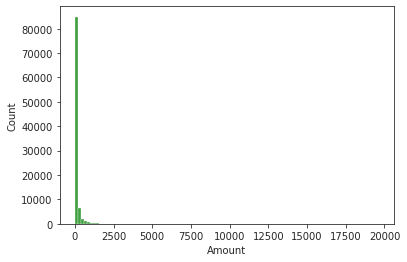

In [67]:
sns.histplot(df['Amount'], bins=100, color='g')
sns.set_style("darkgrid")

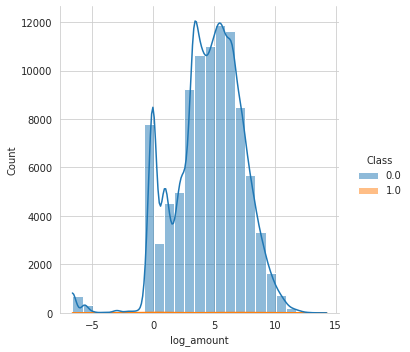

In [68]:
sns.set_style("whitegrid")
df['log_amount'] = np.log2(df['Amount']+0.01)
sns.displot(x='log_amount', bins=25, kde=True, hue='Class', data=df, palette='tab10')

In [69]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

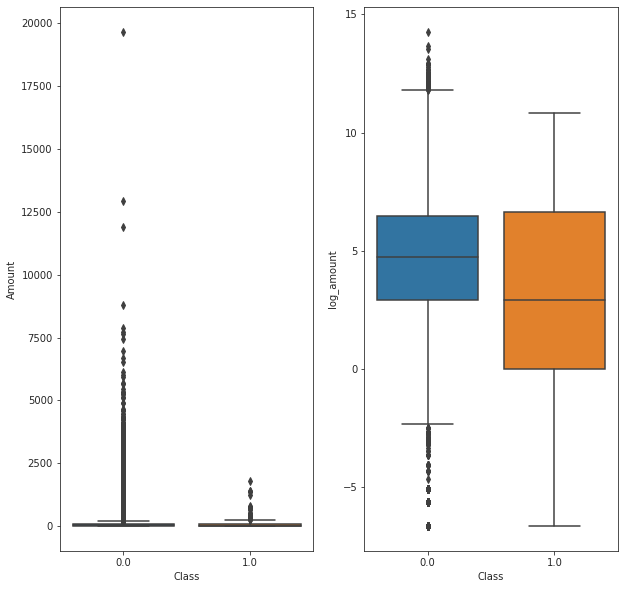

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10)) 
ax.flatten()
sns.boxplot(x = "Class", y = "Amount", data = df, ax = ax[0])
sns.boxplot(x = "Class", y = "log_amount", data = df, ax = ax[1])

In [71]:
fraud = df[df['Class']==1]

In [72]:
not_fraud = df[df['Class']==0]

In [73]:
print(fraud.shape, not_fraud.shape)

(219, 31) (96076, 31)


In [74]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,7.225256
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1.432959
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,8.564797
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,6.948484
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,6.129283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96290,1.228060,0.129418,0.192568,0.018252,-0.397910,-1.117134,0.225054,-0.181625,-0.329145,0.031868,1.718144,0.980925,-0.182210,0.652908,0.145500,0.258411,-0.372839,-0.569868,0.490239,-0.060234,-0.375050,-1.192315,0.215596,0.541428,0.036935,0.591993,-0.106528,-0.003288,14.99,0.0,3.906891
96291,-2.277292,2.625908,-0.217642,0.155304,-1.163384,-0.139224,-2.447670,-4.295778,-0.830003,-1.586645,-0.909437,-0.021059,-1.642676,1.230503,0.822053,1.001695,0.696219,0.183899,-0.450741,1.194003,-2.733226,-0.048236,0.570560,0.247439,-0.249301,0.052465,0.017467,0.103844,1.98,0.0,0.992768
96292,-5.050804,5.178104,-2.294719,-0.207794,-0.850621,-1.500161,0.578087,0.275593,3.309103,6.629587,-0.021349,0.686462,0.840371,-0.993742,0.885520,-0.995489,-0.285096,-0.542762,-0.217465,2.586246,-0.522640,0.319796,0.320929,0.338065,0.317672,-0.442743,1.399913,0.347708,1.79,0.0,0.847997
96293,1.146237,-0.344038,-0.393206,-0.077223,0.097271,0.176321,0.003203,0.104696,0.203273,-0.057785,0.455140,0.187898,-1.145491,0.571813,-0.151670,-0.077957,-0.166603,-0.276412,0.542445,-0.025958,-0.038656,-0.165924,-0.219896,-0.769429,0.497543,1.152602,-0.102206,-0.020313,70.00,0.0,6.129489


In [75]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [76]:
x_nm, y_nm = nm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [77]:
df.isnull().any()

V1            False
V2            False
V3            False
V4            False
V5            False
V6            False
V7            False
V8            False
V9            False
V10           False
V11           False
V12           False
V13           False
V14           False
V15           False
V16           False
V17           False
V18           False
V19           False
V20           False
V21           False
V22           False
V23           False
V24           False
V25           False
V26           False
V27           False
V28           False
Amount        False
Class         False
log_amount    False
dtype: bool